In [2]:
# disable warnings
if True:
    def warn(*args, **kwargs):
        pass
    import warnings
    warnings.warn = warn
import time
# our code
from buildmodel import load_dataset
from buildmodel import save
from buildmodel import develop_model
import extract_features
from pandas import DataFrame

# modeling techniques
from sklearn import linear_model
from sklearn import neural_network
from sklearn import neighbors

# inline plots
%matplotlib notebook

In [3]:
# load raw dataset

# before
dataset = load_dataset(("a_1","a_2","a_3","a_4","a_5","b_1","b_2","b_3","b_4","b_5"), take_weighted_average=True)

# after
# dataset = load_dataset(("a_1","b_1","a_2","b_2","a_3","b_3","a_4","b_4","a_5","b_5"), take_weighted_average=True)

# form into X and y
X = dataset.loc[:,['x','y']].values
y_left  = dataset.left
y_right = dataset.right

Dataset 1, 237763 samples
Dataset 2, 221348 samples
Dataset 3, 230029 samples
Dataset 4, 231996 samples
Dataset 5, 229798 samples
Dataset 6, 235857 samples
Dataset 7, 231088 samples
Dataset 8, 228466 samples
Dataset 9, 230556 samples
Dataset 10, 226914 samples
Took 3.787446975708008 seconds to compute


In [5]:
start = time.time()
left  = linear_model.LinearRegression().fit(X, y_left)
print("Left Took "+str(time.time()-start)+" seconds to fit")
start = time.time()
right = linear_model.LinearRegression().fit(X, y_right)
print("Right Took "+str(time.time()-start)+" seconds to fit")

save(left, '../models/linear_regression/matrix_9x9', 'left.pkl')
save(right, '../models/linear_regression/matrix_9x9', 'right.pkl')

Left Took 0.19067072868347168 seconds to fit
Right Took 0.0777120590209961 seconds to fit
saved model to [../models/linear_regression/matrix_9x9/left.pkl]
saved model to [../models/linear_regression/matrix_9x9/right.pkl]


In [6]:
start = time.time()
left  = neural_network.MLPRegressor((5), activation="relu").fit(X, y_left)
print("Left Took "+str(time.time()-start)+" seconds to fit")
start = time.time()
right = neural_network.MLPRegressor((5), activation="relu").fit(X, y_right)
print("Right Took "+str(time.time()-start)+" seconds to fit")
 
save(left, '../models/neural_network/matrix_9x9', 'left.pkl')
save(right, '../models/neural_network/matrix_9x9', 'right.pkl')

Left Took 607.8810169696808 seconds to fit
Right Took 647.4579100608826 seconds to fit
saved model to [../models/neural_network/matrix_9x9/left.pkl]
saved model to [../models/neural_network/matrix_9x9/right.pkl]


<IPython.core.display.Javascript object>


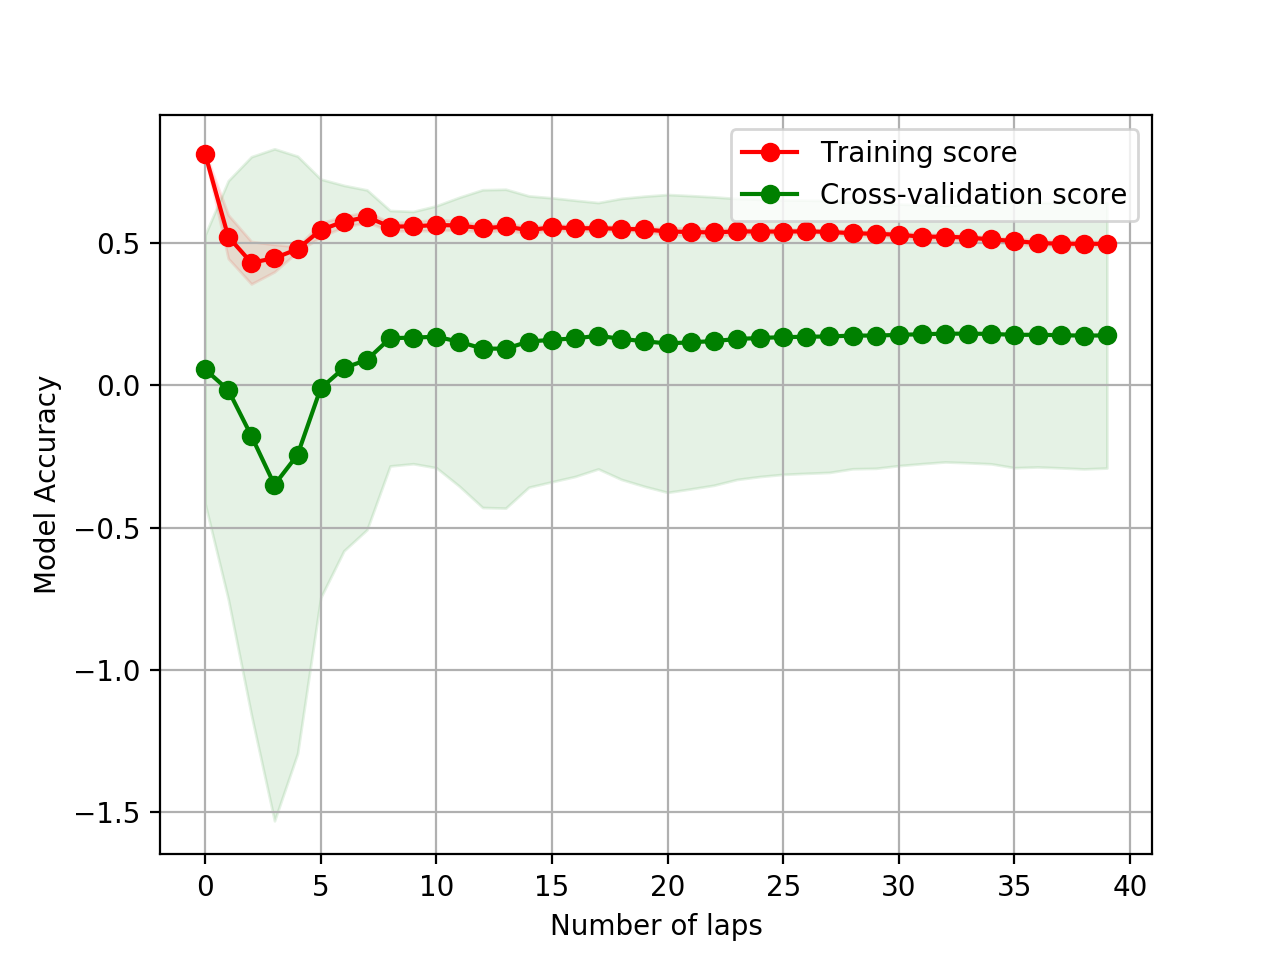

<IPython.core.display.Javascript object>


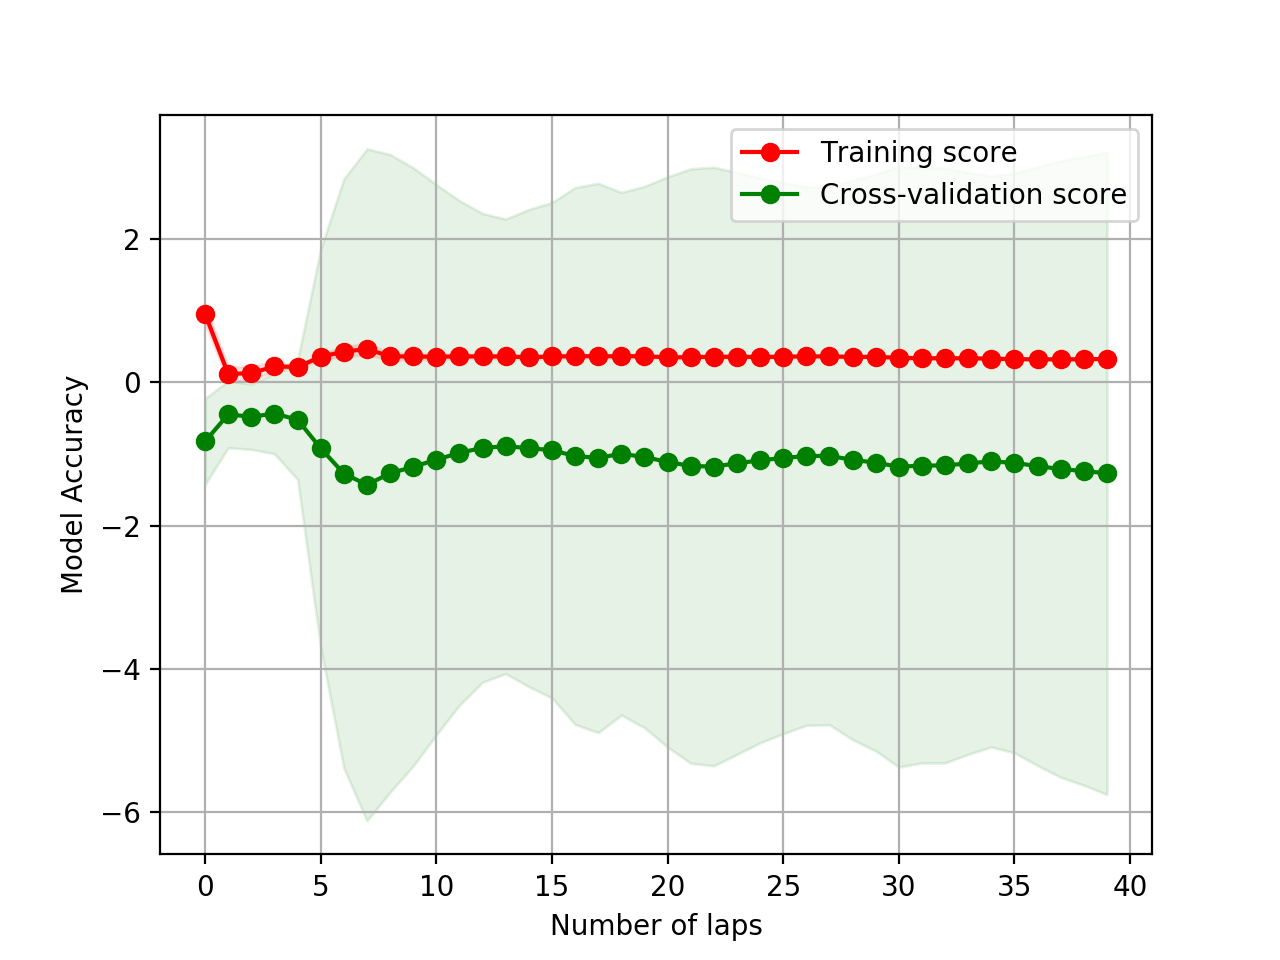

saved model to [../models/linear_regression/weighted_xy/left.pkl]
saved model to [../models/linear_regression/weighted_xy/right.pkl]


In [7]:
# develop model for left & right motors

left  = develop_model( X, y_left, 
                         linear_model.LinearRegression(), 
                         plot_learning=True,
                         plot_heatmap=False,
                         name='Linear Regression - Left Motor')

right = develop_model( X, y_right, 
                         linear_model.LinearRegression(),
                         plot_learning=True,
                         plot_heatmap=False,
                         name='Linear Regression - Right Motor')

# save models

save(left, '../models/linear_regression/weighted_xy', 'left.pkl')
save(right, '../models/linear_regression/weighted_xy', 'right.pkl')

In [ ]:
# develop model for left & right motors

left  = develop_model( X, y_left, 
                         neural_network.MLPRegressor((5), activation="relu"),
                         plot_learning=True,
                         plot_heatmap=True,
                         name='Neural Network - Left Motor')

right = develop_model( X, y_right, 
                         neural_network.MLPRegressor((5), activation="relu"),
                         plot_learning=True,
                         plot_heatmap=True,
                         name='Neural Network - Right Motor')

# save(left, '../models/neural_network/weighted_xy', 'left.pkl')
# save(right, '../models/neural_network/weighted_xy', 'right.pkl')

<IPython.core.display.Javascript object>